In [2]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [34]:
data = pd.read_csv("C:/Users/renea/Desktop/winequality-red.csv", sep = ';')
#data = data.to_numpy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
"""Dropping the first column containing the index values
which is of no use for us"""
data = data.iloc[:,1:]
print(data.head())

   volatile acidity  citric acid  residual sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  


In [37]:
data.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
data.corr()['quality']

volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

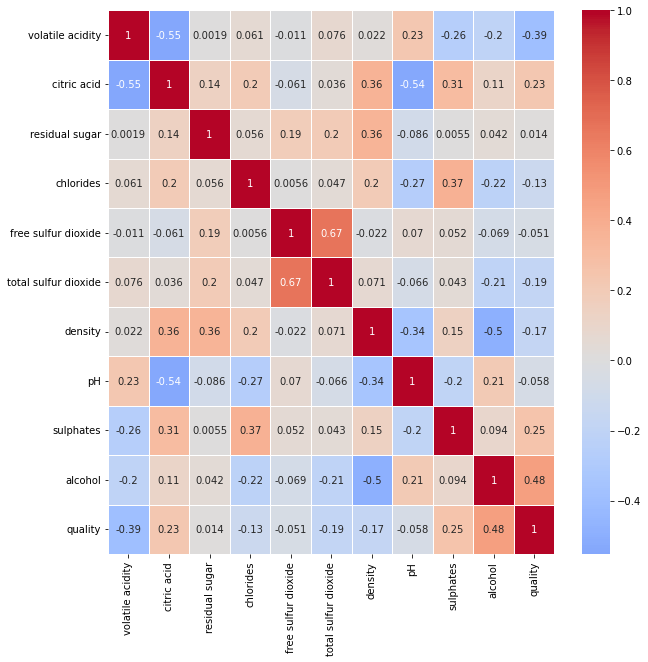

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

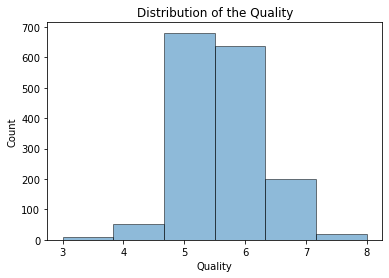

In [40]:
plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

C:\Users\renea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


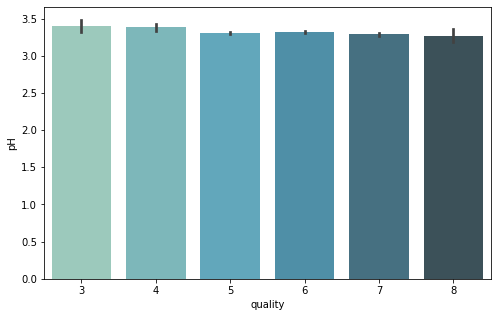

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['pH'],palette="GnBu_d")
plt.show()

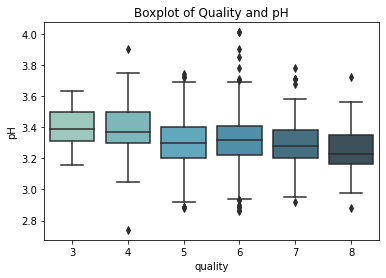

In [42]:
sns.boxplot(x='quality',y='pH',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

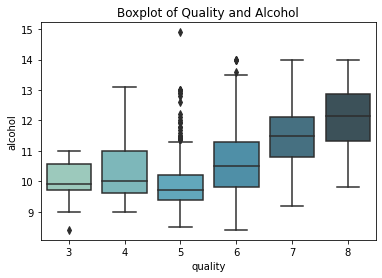

In [43]:
ax = sns.boxplot(x='quality',y='alcohol',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

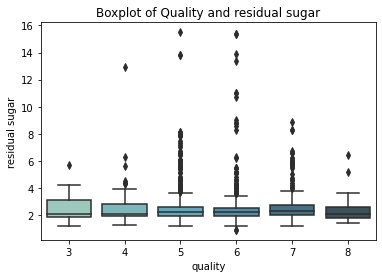

In [44]:
sns.boxplot(x="quality",y="residual sugar",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

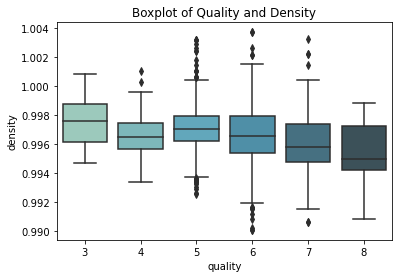

In [45]:
sns.boxplot(x="quality",y="density",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()

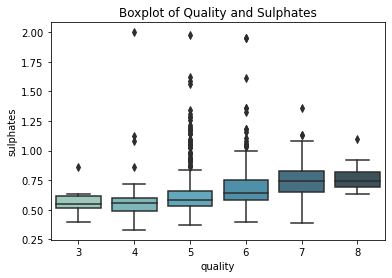

In [46]:
sns.boxplot(x="quality",y="sulphates",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

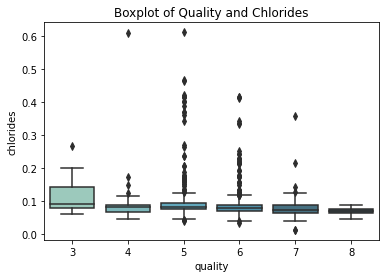

In [47]:
sns.boxplot(x="quality",y="chlorides",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Chlorides")
plt.show()

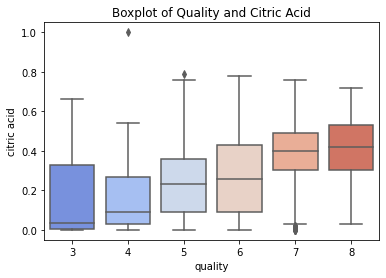

In [48]:
sns.boxplot(x="quality",y="citric acid",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

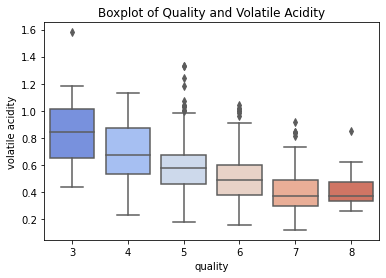

In [49]:
sns.boxplot(x="quality",y="volatile acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

In [50]:
sns.boxplot(x="quality",y="fixed acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()

ValueError: Could not interpret input 'fixed acidity'

In [26]:
# MODELING


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = data.iloc[:,:11].values
Y = data.iloc[:,-1].values

#Splitting the dataset into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Training using Logistic Regression
cl = LogisticRegression()
cl.fit(X_train,Y_train)

#Making confusion matrix
cm = confusion_matrix(Y_test,cl.predict(X_test))
print(cm)

[[  0   2   0   0   0   0]
 [  0  13   1   0   0   0]
 [  0   0 169   0   0   0]
 [  0   0   0 170   0   0]
 [  0   0   0   0  40   0]
 [  0   0   0   0   2   3]]


In [27]:
#Applying SVM
from sklearn.svm import SVC
cl = SVC(kernel="rbf")
cl.fit(X_train,Y_train)

cm = confusion_matrix(Y_test,cl.predict(X_test))
print(cm)

[[  0   2   0   0   0   0]
 [  0  11   2   1   0   0]
 [  0   0 169   0   0   0]
 [  0   0   1 169   0   0]
 [  0   0   0   0  40   0]
 [  0   0   0   0   4   1]]


In [ ]:
# For more information: 

# Source 1: https://www.kaggle.com/scsaurabh/red-wine-quality-analysis-python
# Source 2: https://sites.google.com/view/vinegarhill-datalabs/introduction-to-machine-learning/machine-learning-and-vinho-verde
# Source 3: https://www.youtube.com/watch?v=lHwESP3-Efg